### Importacion de Librerias y Modulos

### Importacion de Librerias y Modulos

In [1]:
from functions.datos import Simulador_Ventas
import functions.limpiar_datos as ld
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Generar archivos CSV para Ventas y Clientes

### Contenido:
Modulo datos.py creado para generar csv bajo los siguientes lineamientos:

1. Generar dos archivos CSV llamados "ventas.csv" y "clientes.csv" que contengan los datos de ventas y clientes, respectivamente. 
2. Los datos deben ser generados aleatoriamente utilizando funciones de probabilidad (indique en su informe que distribución uso: uniforme, normal u otra).
3. Los valores nulos deben representarse con la palabra "NULL". En el archivo "ventas.csv"
    - La columna "Producto" puede contener hasta un 10% de valores nulos. 
    - En el archivo "clientes.csv", las columnas "Nombre" y "Edad" pueden contener hasta un 5% de valores nulos cada una.

In [2]:
Simulador_Ventas(100,5)

Archivo 'clientes.csv' generado con exito
Archivo 'ventas.csv' generado con exito


/Users/airi0x02/Documents/Software_DS/ICIF1042_Taller2/functions/datos.py:47: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_ventas = df_ventas._append(venta, ignore_index=True)


# Limpieza de Datos

1. Cargar los datos de ventas y clientes desde los archivos CSV generados utilizando Pandas y almacenarlos en DataFrames separados.
2. Realizar una limpieza de datos inicial en ambos DataFrames, manejando los valores nulos y convirtiendo los tipos de datos según sea necesario.
   Documentar en el informe los pasos realizados para la limpieza de datos. Realizar una limpieza de datos inicial en ambos DataFrames, 
   manejando los valores nulos y convirtiendo los tipos de datos según sea necesario. Documentar en el informe los pasos realizados para la limpieza de datos. 

## Exploración de Datos
### Cargar Datos:

In [2]:
df_ventas = pd.read_csv("data/ventas.csv")

In [3]:
df_ventas.head()
df_ventas = ld.Limpiar_Datos(df_ventas,'ventas')

Las filas de 'ventas' que contengan valores NULL serán impotadas con la Moda 


/Users/airi0x02/Documents/Software_DS/ICIF1042_Taller2/functions/limpiar_datos.py:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Producto"].fillna(data["Producto"].mode()[0], inplace=True)


,ID_Venta,ID_Cliente,Categoría,Producto,Precio,Cantidad
0,1,5.0,Hogar,Refrigerador,274569.889504,3
1,2,1.0,Electrónica,Teléfono,179133.823780,1
2,3,3.0,Hogar,Horno Eléctrico,376863.189049,5
3,4,2.0,Electrónica,Teléfono,60724.025252,3
4,5,4.0,Tecnologia,Teléfono,14657.517880,2
...,...,...,...,...,...,...
95,96,5.0,Electrodomesticos,Licuadora,3114.389282,3
96,97,1.0,Electrónica,Teléfono,399247.614114,1
97,98,5.0,Electrodomesticos,Batidora,15036.484930,5
98,99,2.0,Tecnologia,Audífonos,20787.594787,3


In [4]:
ld.Conversion_Datos(df_ventas,'ventas')

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [6]:
df_clientes = pd.read_csv("data/clientes.csv")

In [31]:
df_clientes.head()

,ID_Cliente,Nombre,Edad,Genero,Ubicacion
0,1.0,Sophia Davis,34.0,Femenino,Centro
1,2.0,Daniel Davis,58.0,Masculino,Oeste
2,3.0,Maria Hall,47.0,Femenino,Sur
3,4.0,Evelyn Lee,60.0,Femenino,Sur
4,NaN,Jesus Hall,NaN,Masculino,Norte


### Limpieza de Datos

In [10]:
df_ventas.info() #Permite conocer los valores nulos del Dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID_Venta    99 non-null     float64
 1   ID_Cliente  82 non-null     float64
 2   Categoría   100 non-null    object 
 3   Producto    86 non-null     object 
 4   Precio      100 non-null    int64  
 5   Cantidad    100 non-null    int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 4.8+ KB


In [19]:
df_ventas.isnull().sum(axis=0) # Suma de cantidad de nulos

ID_Venta       1
ID_Cliente    18
Categoría      0
Producto      14
Precio         0
Cantidad       0
dtype: int64

In [29]:
df_ventas.dropna(thresh=2, inplace=True) #Elimina si la fila tiene 2 valores nulos

Matplotlib is building the font cache; this may take a moment.


array([[<Axes: title={'center': 'ID_Venta'}>,
        <Axes: title={'center': 'ID_Cliente'}>],
       [<Axes: title={'center': 'Precio'}>,
        <Axes: title={'center': 'Cantidad'}>]], dtype=object)

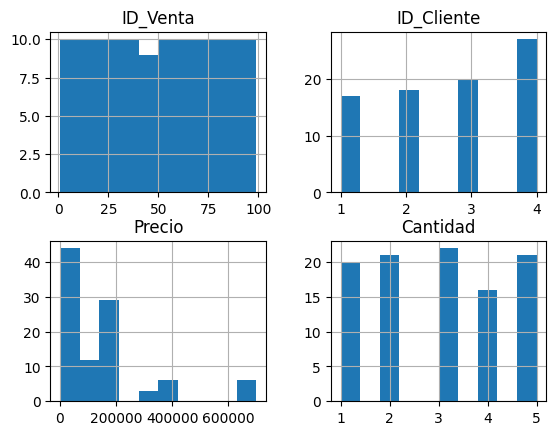

In [25]:
df_ventas.hist()

#### Clientes:

In [18]:
df_clientes.info() #Permite conocer los valores nulos del Dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID_Cliente  4 non-null      float64
 1   Nombre      5 non-null      object 
 2   Edad        4 non-null      float64
 3   Genero      5 non-null      object 
 4   Ubicacion   5 non-null      object 
dtypes: float64(2), object(3)
memory usage: 332.0+ bytes


In [14]:
df_clientes.isnull().sum() # Suma de cantidad de nulos

ID_Cliente    1
Nombre        0
Edad          1
Genero        0
Ubicacion     0
dtype: int64

In [22]:
df_clientes.isnull().sum(axis=0) 

ID_Cliente    1
Nombre        0
Edad          1
Genero        0
Ubicacion     0
dtype: int64

In [23]:
df_clientes.dropna(thresh=2, inplace=True)#Elimina si la fila tiene 2 valores nulos

array([[<Axes: title={'center': 'ID_Cliente'}>,
        <Axes: title={'center': 'Edad'}>]], dtype=object)

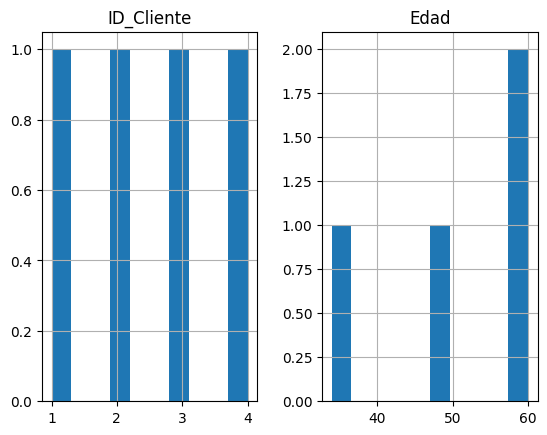

In [26]:
df_clientes.hist()

### Exploración 

#### Ventas:

In [8]:
df_ventas.columns #Permite conocer las columnas del Dataframe

Index(['ID_Venta', 'ID_Cliente', 'Categoría', 'Producto', 'Precio',
       'Cantidad'],
      dtype='object')

In [9]:
df_ventas.shape #Permite conocer el tamaño de los datos del Dataframe

(100, 6)

In [11]:
df_ventas.describe() #Ayuda a saber como se distribuyen las variables numéricas del Dataframe

,ID_Venta,ID_Cliente,Precio,Cantidad
count,99.000000,82.000000,100.000000,100.000000
mean,50.000000,2.695122,149029.000000,2.970000
std,28.722813,1.140598,173125.725499,1.424568
min,1.000000,1.000000,1000.000000,1.000000
25%,25.500000,2.000000,12990.000000,2.000000
50%,50.000000,3.000000,129990.000000,3.000000
75%,74.500000,4.000000,189990.000000,4.000000
max,99.000000,4.000000,699990.000000,5.000000


In [12]:
df_ventas.describe(include=['O']) #Ayuda a saber como se comportan las variables categóricas del Dataframe

,Categoría,Producto
count,100,86
unique,2,15
top,Electrónica,Estufa Electrica
freq,52,12


#### Clientes:

In [16]:
df_clientes.columns #Permite conocer las columnas del Dataframe

Index(['ID_Cliente', 'Nombre', 'Edad', 'Genero', 'Ubicacion'], dtype='object')

In [17]:
df_clientes.shape #Permite conocer el tamaño de los datos del Dataframe

(5, 5)

In [19]:
df_clientes.describe() #Ayuda a saber como se distribuyen las variables numéricas del Dataframe

,ID_Cliente,Edad
count,4.000000,4.000000
mean,2.500000,46.250000
std,1.290994,10.275375
min,1.000000,34.000000
25%,1.750000,40.000000
50%,2.500000,47.000000
75%,3.250000,53.250000
max,4.000000,57.000000


In [20]:
df_clientes.describe(include=['O']) #Ayuda a saber como se comportan las variables categóricas del Dataframe

,Nombre,Genero,Ubicacion
count,5,5,5
unique,5,2,2
top,Ava Lee,Femenino,Este
freq,1,4,3


# Analisis de Datos